<a href="https://colab.research.google.com/github/DommiiUdomp/Dommii/blob/main/IntroML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.datasets import make_classification, make_moons, make_circles

# **Dataset**

In [2]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1)

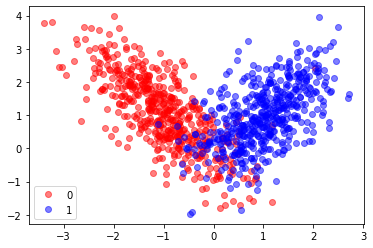

In [7]:
figsize = (8, 4)
fig = plt.plot(figsize=figsize)
plt.plot(X[y==0, 0], X[y==0, 1], 'ro', alpha=0.5, label=0)
plt.plot(X[y==1, 0], X[y==1, 1], 'bo', alpha=0.5, label=1)
plt.legend()

# **Preprocessing**

In [9]:
#Scikit Learn
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler # lie between a given minimum and maximum value, often between zero and one
from sklearn.preprocessing import MaxAbsScaler #the maximum absolute value of each feature is scaled to unit size
from sklearn.preprocessing import QuantileTransformer #non-parametric transformation
from sklearn.preprocessing import PowerTransformer #the Yeo-Johnson transform and the Box-Cox transform
from sklearn.preprocessing import Normalizer #using the l1, l2, or max norms
from sklearn.preprocessing import OneHotEncoder #a one-of-K, also known as one-hot or dummy encoding
from sklearn.preprocessing import OrdinalEncoder #to convert categorical features to such integer codes
from sklearn.preprocessing import KBinsDiscretizer # discretizes features into k bins
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import SplineTransformer #treats each feature separately

from sklearn.pipeline import make_pipeline

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # TRAIN TEST SPLIT

# SCALE DATA
scaler = StandardScaler().fit(X_train)
X_train_scale , X_test_scale = scaler.transform(X_train) , scaler.transform(X_test)
print(X_train_scale)

[[-1.1253886  -0.34431194]
 [-1.73014457  1.44868146]
 [ 0.62177889 -0.20528751]
 ...
 [-1.30678966  0.87905346]
 [-0.93687218 -0.69849299]
 [ 0.32920563  0.52011337]]


In [11]:
minmax = MinMaxScaler().fit(X_train)
X_train_minmax , X_test_minmax = minmax.transform(X_train) , minmax.transform(X_test)
print(X_train_minmax)

max_abs = MaxAbsScaler().fit(X_train)
X_train_max_abs , X_test_max_abs = max_abs.transform(X_train) , max_abs.transform(X_test)
print(X_train_max_abs)

[[0.31339699 0.43511346]
 [0.18735021 0.7488245 ]
 [0.67755188 0.45943786]
 ...
 [0.27558832 0.64915955]
 [0.35268869 0.37314418]
 [0.61657204 0.58635761]]
[[-0.42476577  0.17106834]
 [-0.65612225  0.63141745]
 [ 0.2436336   0.20676271]
 ...
 [-0.49416287  0.48516608]
 [-0.35264661  0.08013274]
 [ 0.13170627  0.3930086 ]]


In [12]:
quantile_transformer = QuantileTransformer(random_state=0).fit(X_train)
X_train_qt , X_test_qt = quantile_transformer.transform(X_train) , quantile_transformer.transform(X_test)
print(X_train_qt)

[[0.15307582 0.38769671]
 [0.03290415 0.9341917 ]
 [0.68383405 0.44635193]
 ...
 [0.10729614 0.7925608 ]
 [0.2074392  0.2546495 ]
 [0.57367668 0.68669528]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (700). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


In [13]:
pt = PowerTransformer(method='yeo-johnson', standardize=False).fit(X_train) #('box-cox', 'yeo-johnson')
X_train_pt , X_test_pt = pt.transform(X_train) , pt.transform(X_test)
print(X_train_pt)

[[-1.30596657  0.66936133]
 [-1.98024995  2.40119268]
 [ 0.81460395  0.80669034]
 ...
 [-1.51026536  1.85882851]
 [-1.09151961  0.3161495 ]
 [ 0.43441602  1.51377409]]


In [14]:
normalized = Normalizer().fit(X_train)
X_train_norm , X_test_norm = normalized.transform(X_train) , normalized.transform(X_test)
print(X_train_norm)

[[-0.89602404  0.44400555]
 [-0.64522287  0.7639944 ]
 [ 0.69165599  0.72222711]
 ...
 [-0.63767038  0.77030934]
 [-0.96306691  0.26926218]
 [ 0.26279459  0.9648518 ]]


In [ ]:
enc = OrdinalEncoder().fit(X_train) #To convert categorical features to such integer code #x
X_train_enc , X_test_enc = enc.transform(X_train) , enc.transform(X_test)
print(X_train_enc)

In [ ]:
one = OneHotEncoder().fit(X_train)  #x

In [ ]:
kbin = KBinsDiscretizer(n_bins=[3,2,2], encode='ordinal').fit(X_train) #x

In [15]:
transformer = FunctionTransformer().fit(X_train)
X_train_transformer , X_test_transformer = transformer.transform(X_train) , transformer.transform(X_test)
print(X_train_transformer)

bi = Binarizer(threshold=1.1).fit(X_train)
X_train_bi , X_test_bi = bi.transform(X_train) , bi.transform(X_test)
print(X_train_bi)

poly = PolynomialFeatures(degree=3, interaction_only=True).fit(X_train)
X_train_poly , X_test_poly = poly.transform(X_train) , poly.transform(X_test)
print(X_train_poly)

spline = SplineTransformer(degree=2, n_knots=3).fit(X_train)
X_train_spline , X_test_spline = spline.transform(X_train) , spline.transform(X_test)
print(X_train_spline)

[[-1.37398116  0.68084698]
 [-2.12234522  2.5130229 ]
 [ 0.78807662  0.82290953]
 ...
 [-1.59845854  1.93094674]
 [-1.14069878  0.31892595]
 [ 0.42602759  1.56416269]]
[[0. 0.]
 [0. 1.]
 [0. 0.]
 ...
 [0. 1.]
 [0. 0.]
 [0. 1.]]
[[ 1.         -1.37398116  0.68084698 -0.93547092]
 [ 1.         -2.12234522  2.5130229  -5.33350213]
 [ 1.          0.78807662  0.82290953  0.64851576]
 ...
 [ 1.         -1.59845854  1.93094674 -3.0865383 ]
 [ 1.         -1.14069878  0.31892595 -0.36379845]
 [ 1.          0.42602759  1.56416269  0.66637646]]
[[0.06964136 0.73392329 0.19643535 ... 0.61293203 0.37864744 0.        ]
 [0.19549978 0.73430002 0.0702002  ... 0.12617826 0.74999447 0.12382726]
 [0.         0.20794558 0.72900508 ... 0.57454313 0.4221663  0.        ]
 ...
 [0.1007212  0.74738095 0.15189785 ... 0.24617804 0.70932482 0.04449714]
 [0.04340124 0.70782013 0.24877862 ... 0.68934205 0.27847315 0.        ]
 [0.         0.294034   0.67878792 ... 0.34220006 0.64288467 0.01491527]]


In [16]:
all_X_train = pd.concat([pd.DataFrame(X_train_scale), pd.DataFrame(X_train_minmax), pd.DataFrame(X_train_max_abs),
                         pd.DataFrame(X_train_qt), pd.DataFrame(X_train_pt), pd.DataFrame(X_train_norm), pd.DataFrame(X_train_transformer),
                         pd.DataFrame(X_train_bi), pd.DataFrame(X_train_poly), pd.DataFrame(X_train_spline)], 
                        axis=1)
all_X_train.describe()

0             1  ...           6           7
count  7.000000e+02  7.000000e+02  ...  700.000000  700.000000
mean  -2.870720e-17  1.801733e-16  ...    0.461829    0.030051
std    1.000715e+00  1.000715e+00  ...    0.220904    0.063778
min   -2.629026e+00 -2.831172e+00  ...    0.000000    0.000000
25%   -8.115126e-01 -7.117558e-01  ...    0.275020    0.000000
50%    1.021690e-01 -6.541794e-02  ...    0.468338    0.000000
75%    8.017581e-01  7.458466e-01  ...    0.679221    0.031678
max    2.168843e+00  2.884257e+00  ...    0.749997    0.500000

[8 rows x 28 columns]

In [17]:
all_X_train.columns = ['scale_1','scale_2', 'minmax_1', 'minmax_2', 'max_abs_1', 'max_abs_2', 'qt_1', 'qt_2', 'pt_1', 'pt_2', 'norm_1', 'norm_2',
                       'transformer_1', 'transformer_2', 'bi_1', 'bi_2', 'poly_1', 'poly_2', 'poly_3', 'poly_4',
                       'spline_1', 'spline_2', 'spline_3', 'spline_4', 'spline_5', 'spline_6', 'spline_7', 'spline_8']
all_X_train.head()              

scale_1   scale_2  minmax_1  ...  spline_6  spline_7  spline_8
0 -1.125389 -0.344312  0.313397  ...  0.612932  0.378647  0.000000
1 -1.730145  1.448681  0.187350  ...  0.126178  0.749994  0.123827
2  0.621779 -0.205288  0.677552  ...  0.574543  0.422166  0.000000
3 -1.298817  1.642422  0.277250  ...  0.094419  0.745717  0.159864
4  0.431031 -1.075157  0.637795  ...  0.736894  0.188794  0.000000

[5 rows x 28 columns]

In [22]:
all_XX = pd.concat([pd.DataFrame(X_train),all_X_train], axis = 1)
all_XX

0         1   scale_1  ...  spline_6  spline_7  spline_8
0   -1.373981  0.680847 -1.125389  ...  0.612932  0.378647  0.000000
1   -2.122345  2.513023 -1.730145  ...  0.126178  0.749994  0.123827
2    0.788077  0.822910  0.621779  ...  0.574543  0.422166  0.000000
3   -1.588593  2.710997 -1.298817  ...  0.094419  0.745717  0.159864
4    0.552033 -0.065969  0.431031  ...  0.736894  0.188794  0.000000
..        ...       ...       ...  ...       ...       ...       ...
695  0.948700  1.089025  0.751579  ...  0.490044  0.509906  0.000050
696  1.517869  2.148674  1.211527  ...  0.196640  0.733840  0.069519
697 -1.598459  1.930947 -1.306790  ...  0.246178  0.709325  0.044497
698 -1.140699  0.318926 -0.936872  ...  0.689342  0.278473  0.000000
699  0.426028  1.564163  0.329206  ...  0.342200  0.642885  0.014915

[700 rows x 30 columns]

In [23]:
all_XX.to_excel('all.xlsx')

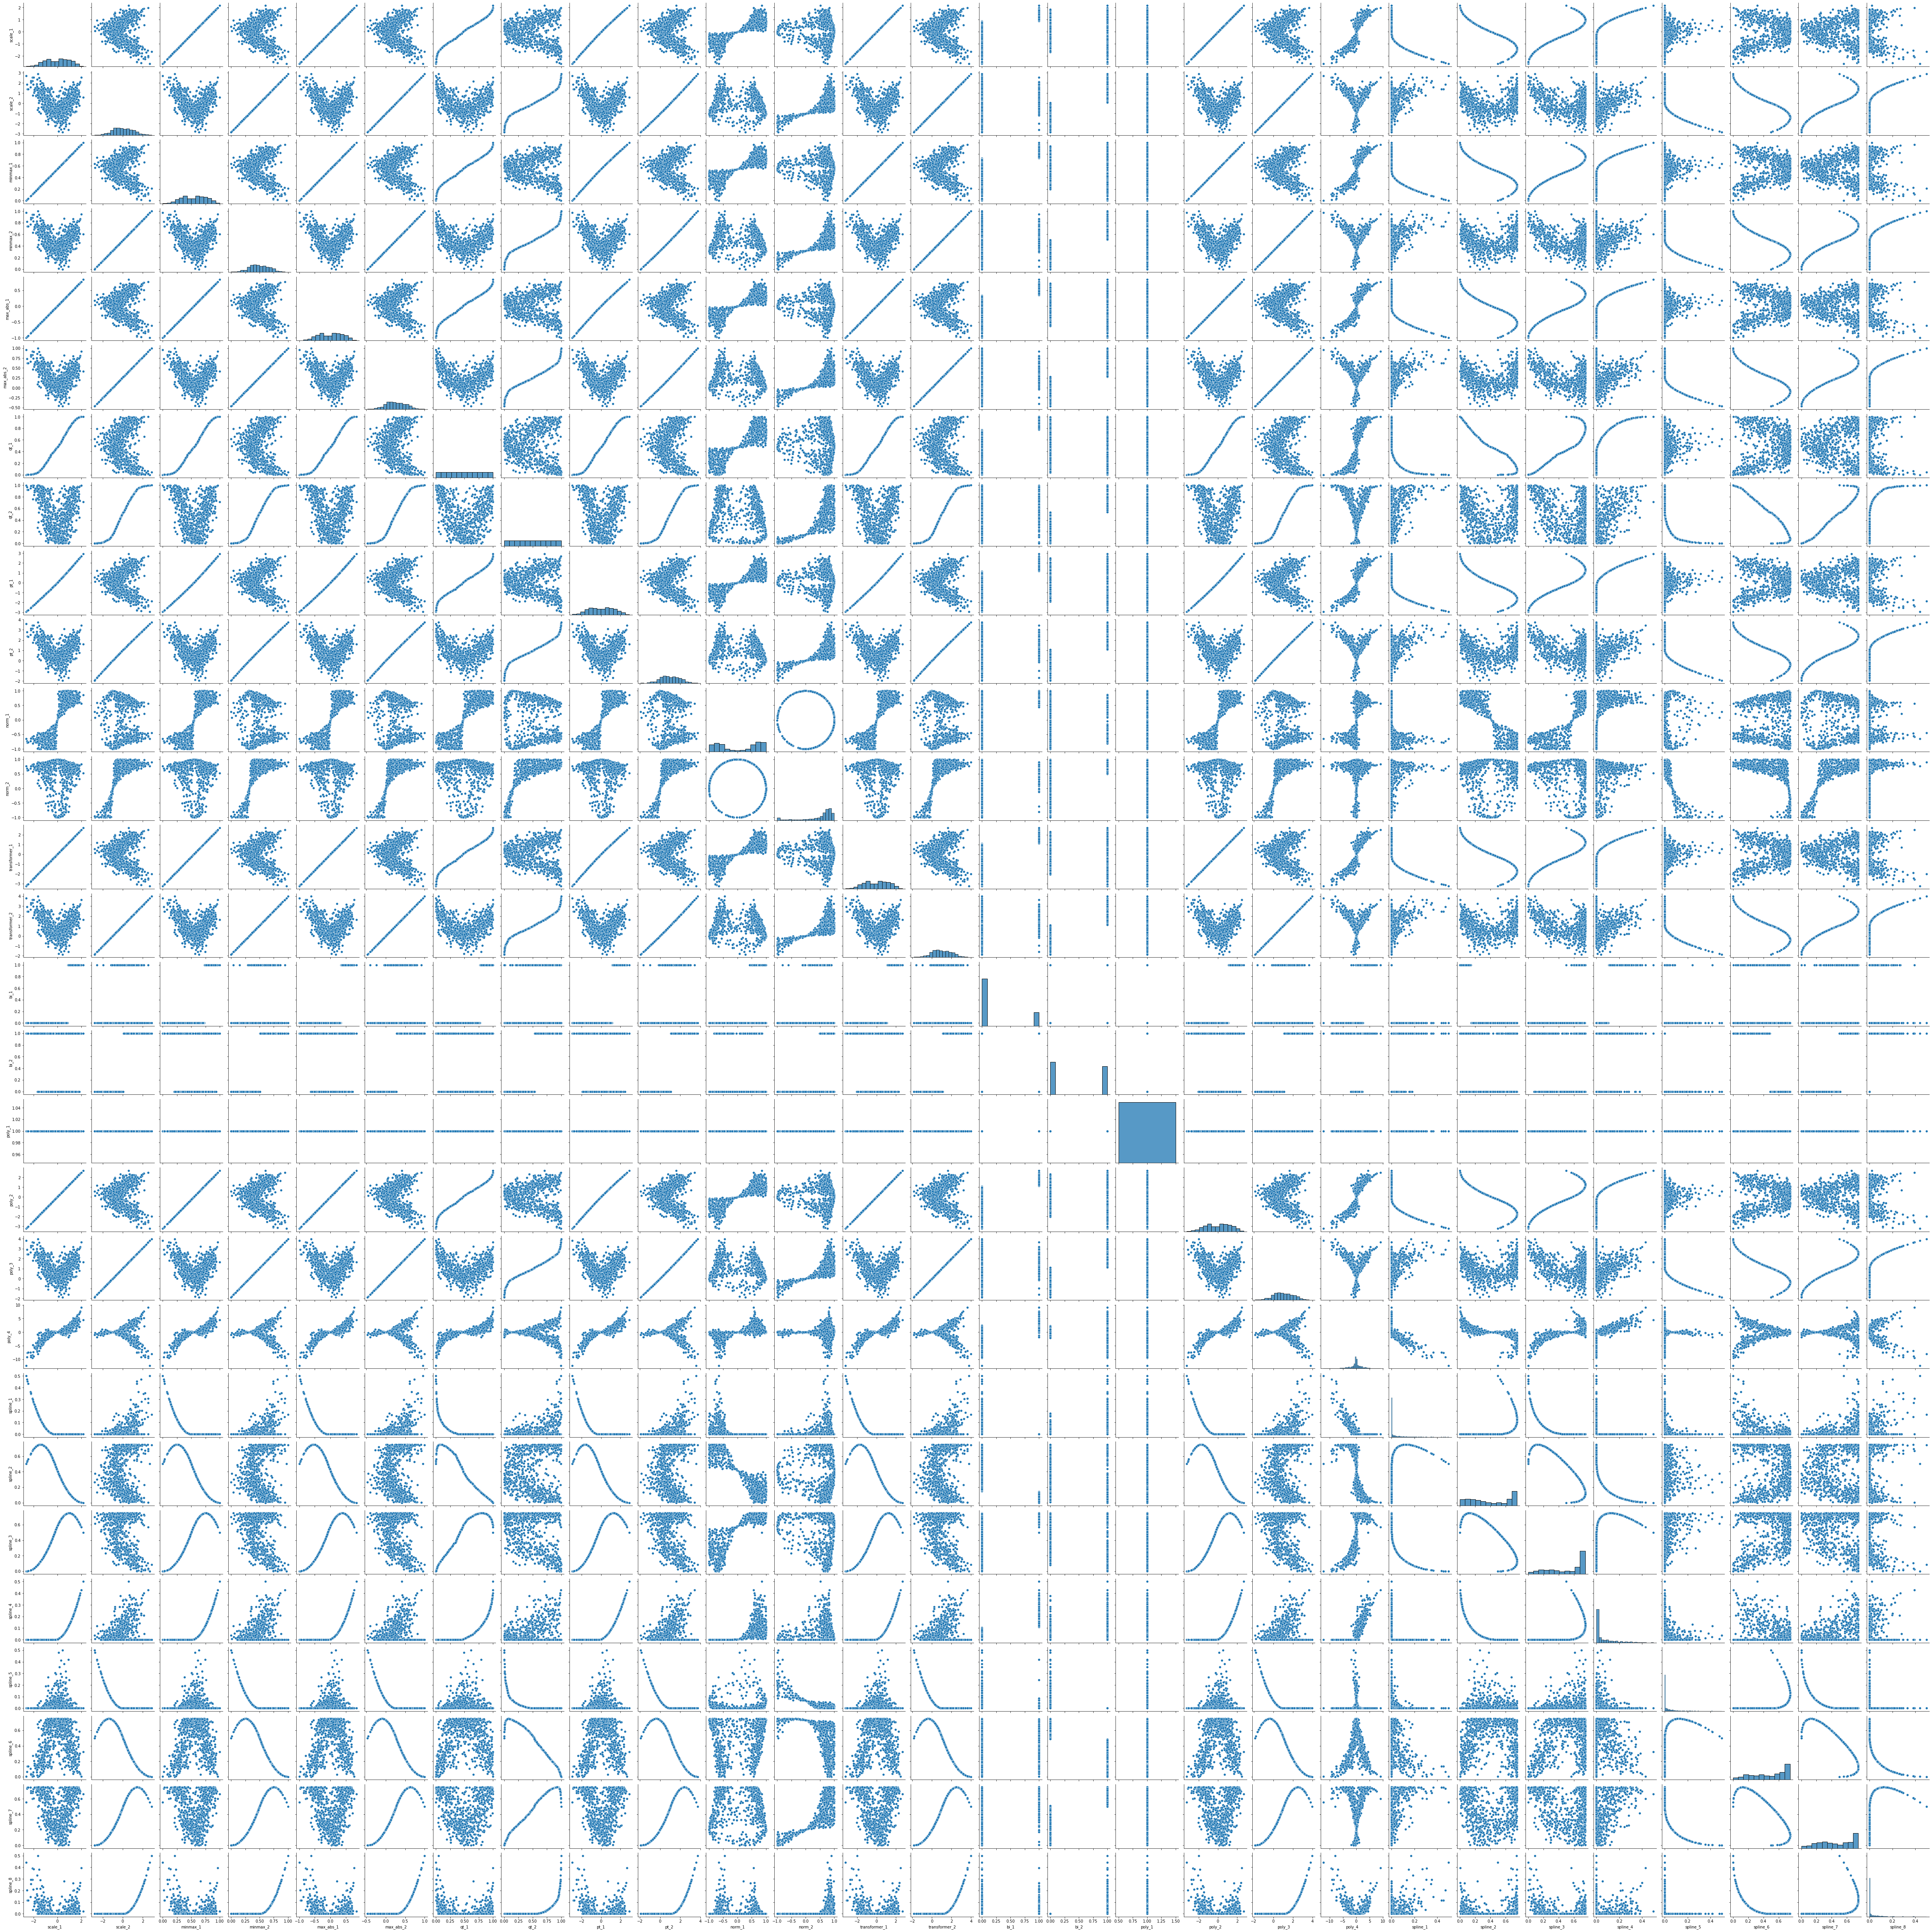

In [ ]:
sns.pairplot(all_X_train)

# **Least Square Line**

The classicle case is  y=mx+b

# **LinearRegression**

# **Build Models**

In [24]:
from sklearn import linear_model

In [25]:
#Linear classifiers
model_lr = linear_model.LogisticRegression().fit(X_train,y_train) #Logistic Regression (aka logit, MaxEnt) classifier.
model_lrcv = linear_model.LogisticRegressionCV().fit(X_train,y_train) #Logistic Regression CV (aka logit, MaxEnt) classifier.
model_passive = linear_model.PassiveAggressiveClassifier().fit(X_train,y_train) #Passive Aggressive Classifier.
model_perceptron = linear_model.Perceptron().fit(X_train,y_train) #Linear perceptron classifier.
model_ridge = linear_model.RidgeClassifier().fit(X_train,y_train) #Classifier using Ridge regression.
model_ridgecv = linear_model.RidgeClassifierCV().fit(X_train,y_train) #Ridge classifier with built-in cross-validation.
model_sgd = linear_model.SGDClassifier().fit(X_train,y_train) #Linear classifiers (SVM, logistic regression, etc.) with SGD training.
model_sgeone = linear_model.SGDOneClassSVM().fit(X_train,y_train) #Solves linear One-Class SVM using Stochastic Gradient Descent.


In [39]:
model_params = pd.concat([pd.Series(model_lr.get_params()), pd.Series(model_lrcv.get_params()),
                          pd.Series(model_passive.get_params()), pd.Series(model_perceptron.get_params()),
                          pd.Series(model_ridge.get_params()), pd.Series(model_ridgecv.get_params()),
                          pd.Series(model_sgd.get_params()) , pd.Series(model_sgeone.get_params())
                          ], axis=1)
model_params.columns = ['Logislinear', 'LogislinearCV', 'PassiveA', 'LPerceptron', 'ClassR', 'RidgeCl', 
                        'LrCl', 'SVMone']
print(model_params)

                    Logislinear LogislinearCV  ...     LrCl   SVMone
C                             1           NaN  ...      NaN      NaN
class_weight               None          None  ...     None      NaN
dual                      False         False  ...      NaN      NaN
fit_intercept              True          True  ...     True     True
intercept_scaling             1             1  ...      NaN      NaN
l1_ratio                   None           NaN  ...     0.15      NaN
max_iter                    100           100  ...     1000     1000
multi_class                auto          auto  ...      NaN      NaN
n_jobs                     None          None  ...     None      NaN
penalty                      l2            l2  ...       l2      NaN
random_state               None          None  ...     None     None
solver                    lbfgs         lbfgs  ...      NaN      NaN
tol                      0.0001        0.0001  ...    0.001    0.001
verbose                       0   

In [49]:
print(model_lr.coef_)
print(model_lrcv.coef_)
print(model_passive.coef_)
print(model_perceptron.coef_)
print(model_ridge.coef_)
print(model_ridgecv.coef_)
print(model_sgd.coef_)

[[3.3529548  0.41317076]]
[[3.5088715  0.45238414]]
[[3.93510943 1.03855899]]
[[3.85179144 1.37245915]]
[[0.6519271 0.0474383]]
[[0.6519271 0.0474383]]
[[ 3.14336986e+00 -2.32190077e-04]]


In [58]:
print(model_lr.score(X_train,y_train))
print(model_lrcv.score(X_train,y_train))
print(model_passive.score(X_train,y_train))
print(model_perceptron.score(X_train,y_train))
print(model_ridge.score(X_train,y_train))
print(model_ridgecv.score(X_train,y_train))
print(model_sgd.score(X_train,y_train))

0.92
0.92
0.9042857142857142
0.9085714285714286
0.9185714285714286
0.9185714285714286
0.9114285714285715


# **Model Evaluation**

# **Classification Metrics**

In [59]:
#Classification metrics
from sklearn import metrics 

In [61]:
y_pred_lr = model_lr.predict(X_test)
y_pred_lrcv = model_lrcv.predict(X_test)
y_pred_passive = model_passive.predict(X_test)
y_pred_perceptron = model_perceptron.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)
y_pred_ridgecv = model_ridgecv.predict(X_test)
y_pred_sgd = model_sgd.predict(X_test)
y_pred_sgdone = model_sgeone.predict(X_test)

In [62]:
print(f'Accuracy score {metrics.accuracy_score(y_test, y_pred_lr)}') #Accuracy classification score.
#print(metrics.auc(y_test, y_pred_lr)) #Compute Area Under the Curve (AUC) using the trapezoidal rule.
#print(metrics.average_precision_score(y_test, y_pred_lr)) #Compute average precision (AP) from prediction scores.
print(f'Balance Accuracy score {metrics.balanced_accuracy_score(y_test, y_pred_lr)}') #Compute the balanced accuracy.
print(f'Berier score loss {metrics.brier_score_loss(y_test, y_pred_lr)}') #Compute the Brier score loss.
print(f'Classification report {metrics.classification_report(y_test, y_pred_lr)}') #Build a text report showing the main classification metrics.
print(f'Confusion metrix {metrics.confusion_matrix(y_test, y_pred_lr)}') #Compute confusion matrix to evaluate the accuracy of a classification.
#print(metrics.dcg_score(y_test, y_pred_lr)) #Compute Discounted Cumulative Gain.
print(f'Error rates {metrics.det_curve(y_test, y_pred_lr)}') #Compute error rates for different probability thresholds.
print(f'F-score {metrics.f1_score(y_test, y_pred_lr)}') #Compute the F1 score, also known as balanced F-score or F-measure.
print(f'Average Hamming loss {metrics.hamming_loss(y_test, y_pred_lr)}') #Compute the average Hamming loss.
print(f'logistic loss {metrics.log_loss(y_test, y_pred_lr)}') #Log loss, aka logistic loss or cross-entropy loss.
print(f'Matthews correlation coefficient (MCC) {metrics.matthews_corrcoef(y_test, y_pred_lr)}') #Compute the Matthews correlation coefficient (MCC).
print(f'Confusion matrix for each class {metrics.multilabel_confusion_matrix(y_test, y_pred_lr)}') #Compute a confusion matrix for each class or sample.
#print(metrics.ndcg_score(y_test, y_pred_lr)) #Compute Normalized Discounted Cumulative Gain.
print(f'Precision-recall {metrics.precision_recall_curve( y_test, y_pred_lr)}') #Compute precision-recall pairs for different probability thresholds.
print(f'Precision-recall F-measure {metrics.precision_recall_fscore_support(y_test, y_pred_lr)}') #Compute precision, recall, F-measure and support for each class.
print(f'Precision score {metrics.precision_score(y_test, y_pred_lr)}') #Compute the precision.
print(f'Recall score {metrics.recall_score(y_test, y_pred_lr)}') #Compute the recall.
print(f'ROC AUC score {metrics.roc_auc_score(y_test, y_pred_lr)}') #Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
print(f'ROCy score {metrics.roc_curve(y_test, y_pred_lr)}') #Compute Receiver operating characteristic (ROC).
print(f'TOP K score {metrics.top_k_accuracy_score(y_test, y_pred_lr)}') #Top-k Accuracy classification score.
print(f'Zero-one classification loss {metrics.zero_one_loss(y_test, y_pred_lr)}') #Zero-one classification loss.

Accuracy score 0.9166666666666666
Balance Accuracy score 0.9165178571428572
Berier score loss 0.08333333333333333
Classification report               precision    recall  f1-score   support

           0       0.92      0.92      0.92       160
           1       0.91      0.91      0.91       140

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

Confusion metrix [[147  13]
 [ 12 128]]
Error rates (array([1.     , 0.08125]), array([0.        , 0.08571429]), array([0, 1]))
F-score 0.911032028469751
Average Hamming loss 0.08333333333333333
logistic loss 2.8782660154645328
Matthews correlation coefficient (MCC) 0.8326826424835706
Confusion matrix for each class [[[128  12]
  [ 13 147]]

 [[147  13]
  [ 12 128]]]
Precision-recall (array([0.46666667, 0.90780142, 1.        ]), array([1.        , 0.91428571, 0.        ]), array([0, 1]))
Precision-recall F-measure (array([0.9245283

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1748: UndefinedMetricWarning: 'k' (2) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  UndefinedMetricWarning,


In [65]:
#Plotting
from sklearn.metrics import plot_confusion_matrix, plot_det_curve, plot_precision_recall_curve, plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_det_curve is deprecated; Function plot_det_curve is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: DetCurveDisplay.from_predictions or DetCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_p

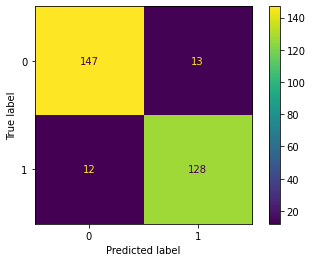

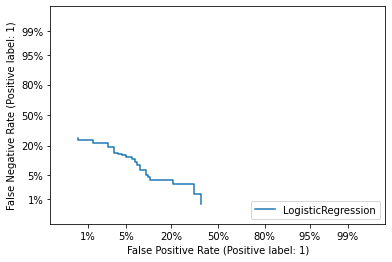

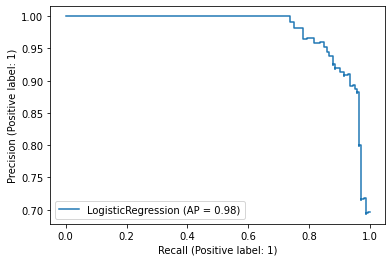

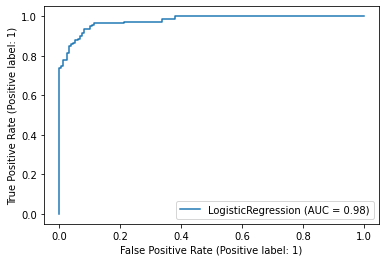

In [66]:
plot_confusion_matrix(model_lr,X_test,y_test)
plot_det_curve(model_lr,X_test,y_test)
plot_precision_recall_curve(model_lr,X_test,y_test)
plot_roc_curve(model_lr,X_test,y_test)

# **Hyper-parameter optimizers**

In [ ]:
from sklearn import  model_selection

In [ ]:
model_selection.GridSearchCV(estimator, …) #Exhaustive search over specified parameter values for an estimator.
model_selection.HalvingGridSearchCV(…[, …]) #Search over specified parameter values with successive halving.
model_selection.ParameterGrid(param_grid) #Grid of parameters with a discrete number of values for each.
model_selection.ParameterSampler(…[, …]) #Generator on parameters sampled from given distributions.
model_selection.RandomizedSearchCV(…[, …]) #Randomized search on hyper parameters.
model_selection.HalvingRandomSearchCV(…[, …]) #Randomized search on hyper parameters.

# **Model validation**

In [ ]:
cross_validate = model_selection.cross_validate(model_lr,X_train_scale,y_train, scoring='neg_mean_squared_error',cv=5) #Evaluate metric(s) by cross-validation and also record fit/score times.
cross_val_predict = model_selection.cross_val_predict(model_lr,X_train_scale,y_train) #Generate cross-validated estimates for each input data point
cross_val_score = model_selection.cross_val_score(model_lr,X_train_scale,y_train) #Evaluate a score by cross-validation
learning_curve = model_selection.learning_curve(model_lr,X_train_scale,y_train) #Learning curve.
permutation_test_score = model_selection.permutation_test_score(model_lr,X_train_scale,y_train) #Evaluate the significance of a cross-validated score with permutations
#model_selection.validation_curve(model_lr,X_train_scale,y_train) #Validation curve.

In [ ]:
print(f'cross_validate {cross_validate}')
print(f'cross_val_predict {cross_val_predict}')
print(f'cross_val_score {cross_val_score}')
print(f'learning_curve {learning_curve}')
print(f'permutation_test_score {permutation_test_score}')

# **Final Evaluation**

In [ ]:
model_lr.fit(X_train_scale,y_train)

LogisticRegression()

Confusion metrix [[147  13]
 [ 12 128]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


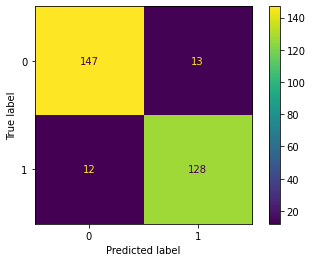

In [ ]:
y_final_test_pred = model_lr.predict(X_test_scale)
print(f'Confusion metrix {metrics.confusion_matrix(y_test, y_final_test_pred)}')
plot_confusion_matrix(model_lr,X_test_scale,y_test)

# **Regression metrics**

In [ ]:
print(f'Variance_score {metrics.explained_variance_score(y_test, y_final_test_pred)}') #Explained variance regression score function.
print(f'Max_error {metrics.max_error(y_test, y_final_test_pred)}') #max_error metric calculates the maximum residual error.
print(f'Mean absolute error {metrics.mean_absolute_error(y_test, y_final_test_pred)}') #Mean absolute error regression loss.
print(f'Mean squared error {metrics.mean_squared_error(y_test, y_final_test_pred)}') #Mean squared error regression loss.
print(f'Mean squared logarithmic error  {metrics.mean_squared_log_error(y_test, y_final_test_pred)}') #Mean squared logarithmic error regression loss.
print(f'Median absolute error {metrics.median_absolute_error(y_test, y_final_test_pred)}') #Median absolute error regression loss.
print(f'Mean absolute percentage error {metrics.mean_absolute_percentage_error(y_test, y_final_test_pred)}') #Mean absolute percentage error regression loss.
print(f'coefficient of determination {metrics.r2_score(y_test, y_final_test_pred)}') #(coefficient of determination) regression score function.
#print(f'Mean Poisson deviance {metrics.mean_poisson_deviance(y_test, y_pred_lr)}') #Mean Poisson deviance regression loss.
#print(f'Mean Gamma deviance {metrics.mean_gamma_deviance(y_test, y_pred_lr)}') #Mean Gamma deviance regression loss.
print(f'Mean Tweedie deviance  {metrics.mean_tweedie_deviance(y_test, y_final_test_pred)}') #Mean Tweedie deviance regression loss.
print(f'Percentage of Tweedie deviance {metrics.d2_tweedie_score(y_test, y_final_test_pred)}') #D^2 regression score function, percentage of Tweedie deviance explained.
print(f'Pinball loss {metrics.mean_pinball_loss(y_test, y_final_test_pred)}') #Pinball loss for quantile regression.

Variance_score 0.6652232142857143
Max_error 1
Mean absolute error 0.08333333333333333
Mean squared error 0.08333333333333333
Mean squared logarithmic error  0.04003775115985011
Median absolute error 0.0
Mean absolute percentage error 195155983852721.53
coefficient of determination 0.6651785714285714
Mean Tweedie deviance  0.08333333333333333
Percentage of Tweedie deviance 0.6651785714285714
Pinball loss 0.041666666666666664


# **Plot**

(348, 355)


([], <a list of 0 Text major ticklabel objects>)

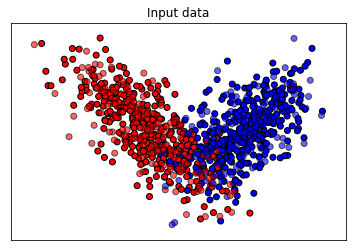

In [ ]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

h = 0.02  # step size in the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print(xx.shape)

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
fig = plt.plot()

plt.title("Input data")
# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k" )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

In [ ]:
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

# **Plot Boundary Linear**

In [ ]:
#Linear classifiers
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, PassiveAggressiveClassifier, Perceptron, RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV, SGDClassifier, SGDOneClassSVM

In [ ]:
names_linearCl = [
                  'LogisticRegression', 'LogisticRegressionCV', 'PassiveAggressiveClassifier', 'Perceptron', 'RidgeClassifier',
                  'RidgeClassifierCV', 'SGDClassifier']

classifiers_linearCl = [
                        LogisticRegression(), LogisticRegressionCV(), PassiveAggressiveClassifier(), 
                        Perceptron(), RidgeClassifier(), RidgeClassifierCV(), SGDClassifier()]

model_lr_linearCl = [model_lr, model_lrcv, model_passive, model_perceptron, model_ridge, model_ridgecv, model_sgd, model_sgeone]

([], <a list of 0 Text major ticklabel objects>)

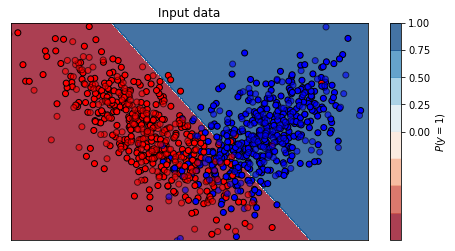

In [ ]:
model = SGDOneClassSVM().fit(X_train_scale,y_train)

amin, bmin = X_train_scale.min(axis=0) - 0.1
amax, bmax = X_train_scale.max(axis=0) + 0.1
hticks = np.linspace(amin, amax, 300)
vticks = np.linspace(bmin, bmax, 300)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]
c = model.predict(ab)
cc = c.reshape(aa.shape)
c.shape

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
fig, ax = plt.subplots(figsize=figsize)
contour = plt.contourf(aa, bb, cc, cmap=cm, alpha=0.8)
    
ax_c = fig.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])
    
plt.title("Input data")
# Plot the training points
plt.scatter(X_train_scale[:, 0], X_train_scale[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
plt.xlim(amin, amax)
plt.ylim(bmin, bmax)

# Plot the testing points
plt.scatter(X_test_scale[:, 0], X_test_scale[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k" )
plt.xticks(())
plt.yticks(())

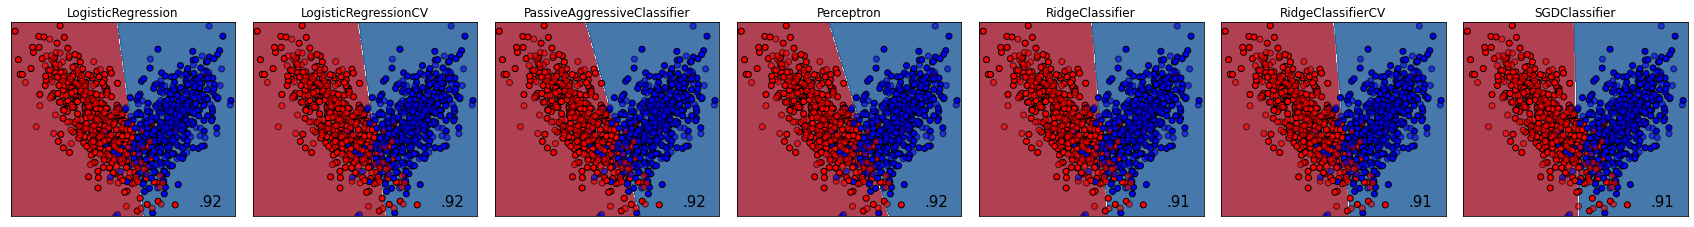

In [ ]:
from os import name
figure = plt.figure(figsize=(27, 9))
i = 1

amin, bmin = X_train_scale.min(axis=0) - 0.1
amax, bmax = X_train_scale.max(axis=0) + 0.1
hticks = np.linspace(amin, amax, 300)
vticks = np.linspace(bmin, bmax, 300)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

for name, clf in zip(names_linearCl, classifiers_linearCl):
  ax = plt.subplot(len(datasets), len(classifiers_linearCl) + 1, i)
  model = clf.fit(X_train_scale, y_train)
  score = model.score(X_test_scale, y_test)

  c = model.predict(ab)
  cc = c.reshape(aa.shape)
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])

  ax.contourf(aa, bb, cc, cmap=cm, alpha=0.8)

# Plot the training points
  ax.scatter(X_train_scale[:, 0], X_train_scale[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
  ax.set_xlim(amin, amax)
  ax.set_ylim(bmin, bmax)

# Plot the testing points
  ax.scatter(X_test_scale[:, 0], X_test_scale[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k" )
  ax.set_xticks(())
  ax.set_yticks(())
  
  ax.set_title(f'{name}')
  ax.text(aa.max() - 0.3, bb.min() + 0.3, ("%.2f" % score).lstrip("0"), size=15, horizontalalignment="right",)

  i += 1

plt.tight_layout()
plt.show()

LR coefficients: [[4.01793983 0.40013995]]
LR intercept: [0.22909568]


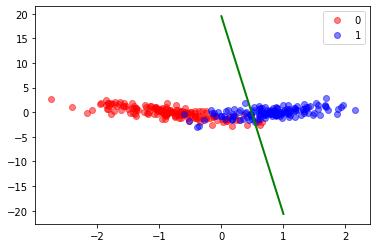

In [ ]:
print('LR coefficients:', model_lr.coef_)
print('LR intercept:', model_lr.intercept_)

figsize = (8, 4)
fig = plt.plot(figsize=figsize)
plt.plot(X_test_scale[y_test==0, 0], X_test_scale[y_test==0, 1], 'or', alpha=0.5, label=0)
plt.plot(X_test_scale[y_test==1, 0], X_test_scale[y_test==1, 1], 'ob', alpha=0.5, label=1)
plt.legend()

#limits = np.array([-2, 2])
boundary = -(model_lr.coef_[0][0] * limits + model_lr.intercept_[0]) / model_lr.coef_[0][1]
plt.plot(boundary, "g-", linewidth=2)

In [ ]:
model_linearR = LinearRegression()

model_logisticR = LogisticRegression()
model_knn = KNeighborsClassifier(3),
model_svc = SVC(gamma=2, C=1),
model_gauss = GaussianProcessClassifier(1.0 * RBF(1.0)),
model_dt = DecisionTreeClassifier(max_depth=5),
model_rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
model_mlp = MLPClassifier(alpha=1, max_iter=1000),
model_adabst = AdaBoostClassifier(),
model_guessNB = GaussianNB(),
model_qua = QuadraticDiscriminantAnalysis(),

In [ ]:
np.c_[xx.ravel(), yy.ravel()]

array([[-3.88953087, -2.476032  ],
       [-3.86953087, -2.476032  ],
       [-3.84953087, -2.476032  ],
       ...,
       [ 3.15046913,  4.463968  ],
       [ 3.17046913,  4.463968  ],
       [ 3.19046913,  4.463968  ]])

LR coefficients: [[-4.09049818  2.07274152]]
LR intercept: [-0.27800528]


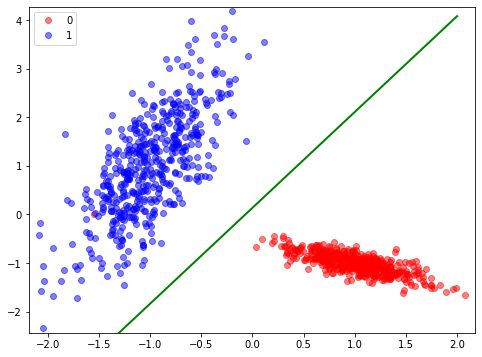

In [ ]:

lr.fit(X, y)
print('LR coefficients:', lr.coef_)
print('LR intercept:', lr.intercept_)
figsize = (8, 6)
plt.figure(figsize=figsize)
plt.plot(X[y==0, 0], X[y==0, 1], 'or', alpha=0.5, label=0)
plt.plot(X[y==1, 0], X[y==1, 1], 'ob', alpha=0.5, label=1)
plt.xlim((min(X[:, 0])-0.1, max(X[:, 0])+0.1))
plt.ylim((min(X[:, 1])-0.1, max(X[:, 1])+0.1))
plt.legend()

limits = np.array([-2, 2])
boundary = -(lr.coef_[0][0] * limits + lr.intercept_[0]) / lr.coef_[0][1]
plt.plot(limits, boundary, "g-", linewidth=2)

In [ ]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

LR coefficients: [[-3.96688648  2.26129135]]
LR intercept: [-0.16230398]


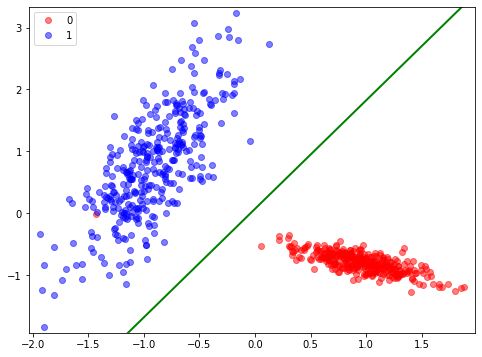

In [ ]:
lr.fit(X_train, y_train)
print('LR coefficients:', lr.coef_)
print('LR intercept:', lr.intercept_)
figsize = (8, 6)
plt.figure(figsize=figsize)
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], 'or', alpha=0.5, label=0)
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], 'ob', alpha=0.5, label=1)
plt.xlim((min(X_train[:, 0])-0.1, max(X_train[:, 0])+0.1))
plt.ylim((min(X_train[:, 1])-0.1, max(X_train[:, 1])+0.1))
plt.legend()

limits = np.array([-2, 2])
boundary = -(lr.coef_[0][0] * limits + lr.intercept_[0]) / lr.coef_[0][1]
plt.plot(limits, boundary, "g-", linewidth=2)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


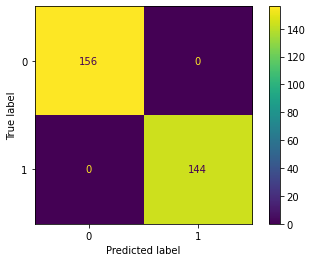

In [ ]:
confusion_matrix(y_test,y_pred)
plot_confusion_matrix(lr,X_test,y_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00       144

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [ ]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

In [ ]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [ ]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l1'}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


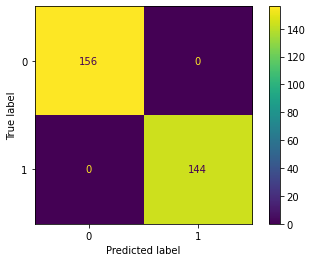

In [ ]:
y_pred = grid_model.predict(X_test)
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
plot_confusion_matrix(grid_model,X_test,y_test)

# **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#Fit
Rid = Ridge(alpha=1)
Rid.fit(X_train,y_train)
y_pred = Rid.predict(X_test)
#Evaluation
mean_squared_error(y_test,y_pred)

0.016937058463992644

**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
sc = cross_val_score(Rid,X_train,y_train,
                         scoring='neg_mean_squared_error',cv=5)
sc

array([-0.02068433, -0.01579749, -0.01456761, -0.01342985, -0.01444142])

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
scores = cross_validate(Rid,X_train,y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error','max_error'],cv=5)
scores

{'fit_time': array([0.00162077, 0.00224209, 0.0007956 , 0.00077677, 0.00089264]),
 'score_time': array([0.00170064, 0.00084734, 0.00077128, 0.00082493, 0.001055  ]),
 'test_max_error': array([-1.0396065 , -0.36798906, -0.36084595, -0.41106098, -0.36901751]),
 'test_neg_mean_absolute_error': array([-0.09924935, -0.10068874, -0.0949921 , -0.08687526, -0.09258549]),
 'test_neg_mean_squared_error': array([-0.02068433, -0.01579749, -0.01456761, -0.01342985, -0.01444142])}

In [ ]:
pd.DataFrame(scores)

fit_time  score_time  ...  test_neg_mean_squared_error  test_max_error
0  0.001621    0.001701  ...                    -0.020684       -1.039607
1  0.002242    0.000847  ...                    -0.015797       -0.367989
2  0.000796    0.000771  ...                    -0.014568       -0.360846
3  0.000777    0.000825  ...                    -0.013430       -0.411061
4  0.000893    0.001055  ...                    -0.014441       -0.369018

[5 rows x 5 columns]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [ ]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [ ]:
base_elastic_model = ElasticNet()
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

# **KNN**

In [ ]:
from sklearn.datasets import make_classification, make_moons, make_circles

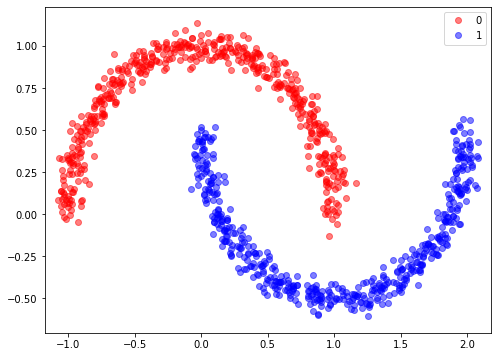

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=0)

figsize = (8, 6)
plt.figure(figsize=figsize)
plt.plot(X[y==0, 0], X[y==0, 1], 'or', alpha=0.5, label=0)
plt.plot(X[y==1, 0], X[y==1, 1], 'ob', alpha=0.5, label=1)
plt.xlim((min(X[:, 0])-0.1, max(X[:, 0])+0.1))
plt.ylim((min(X[:, 1])-0.1, max(X[:, 1])+0.1))
plt.legend()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       163

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

